In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/data/seniment_review_data_batminton.csv")

In [114]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [115]:
df.shape

(8518, 8)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [117]:
df.isnull().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [118]:
#checking both null values
df[df['Review Title'].isnull() & df['Review text'].isnull()]

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
8510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [119]:
# droping both which are null
df.dropna(subset=['Review Title', 'Review text'], how='all', inplace=True)

In [120]:
df.isnull().sum()

Reviewer Name        2
Review Title         2
Place of Review     42
Up Votes             2
Down Votes           2
Month              457
Review text          0
Ratings              0
dtype: int64

 ### TO DO SENTIMENT WE NEED ONLY REVIEW TITLE AND REVIEW TEXT WHICH WE COMBINE BOTH  IN REVIEW

In [121]:
#replacing null values in review title
df['Review Title'] = df['Review Title'].fillna("")

In [122]:
df['Review'] = df['Review text'] + ' ' + df['Review Title']

### CHANGING ALL THE RATINGS INTO POSITIVE, NEAGATIVE IN NEW RATING COLUMN

In [123]:
df['Rating'] = df['Ratings'].apply(lambda x: 'Negative' if x in [1, 2] else 'Positive')

In [124]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,Review,Rating
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,"Nice product, good quality, but price is now r...",Positive
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,They didn't supplied Yonex Mavis 350. Outside ...,Negative
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,Worst product. Damaged shuttlecocks packed in ...,Negative
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3,"Quite O. K. , but nowadays the quality of the...",Positive
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1,Over pricedJust â?¹620 ..from retailer.I didn'...,Negative


<Axes: xlabel='Rating', ylabel='count'>

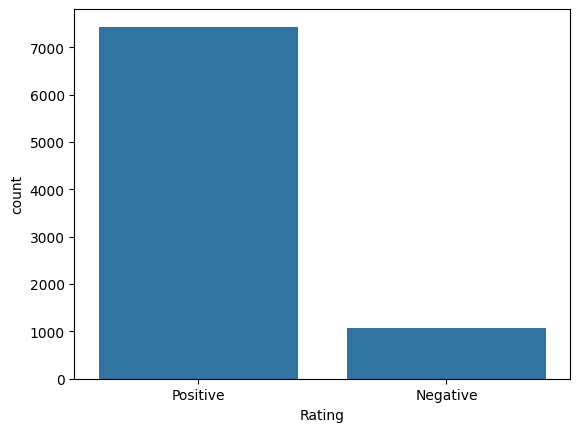

In [125]:
sns.countplot(x = 'Rating',data= df)



*   observation : Imabalnced DATA



In [126]:
# Visuallizing an overall Word Cloud from the given data

from wordcloud import WordCloud

wc = WordCloud(background_color='black',
               width=1000,
               height=800).generate(' '.join(df['Review']))

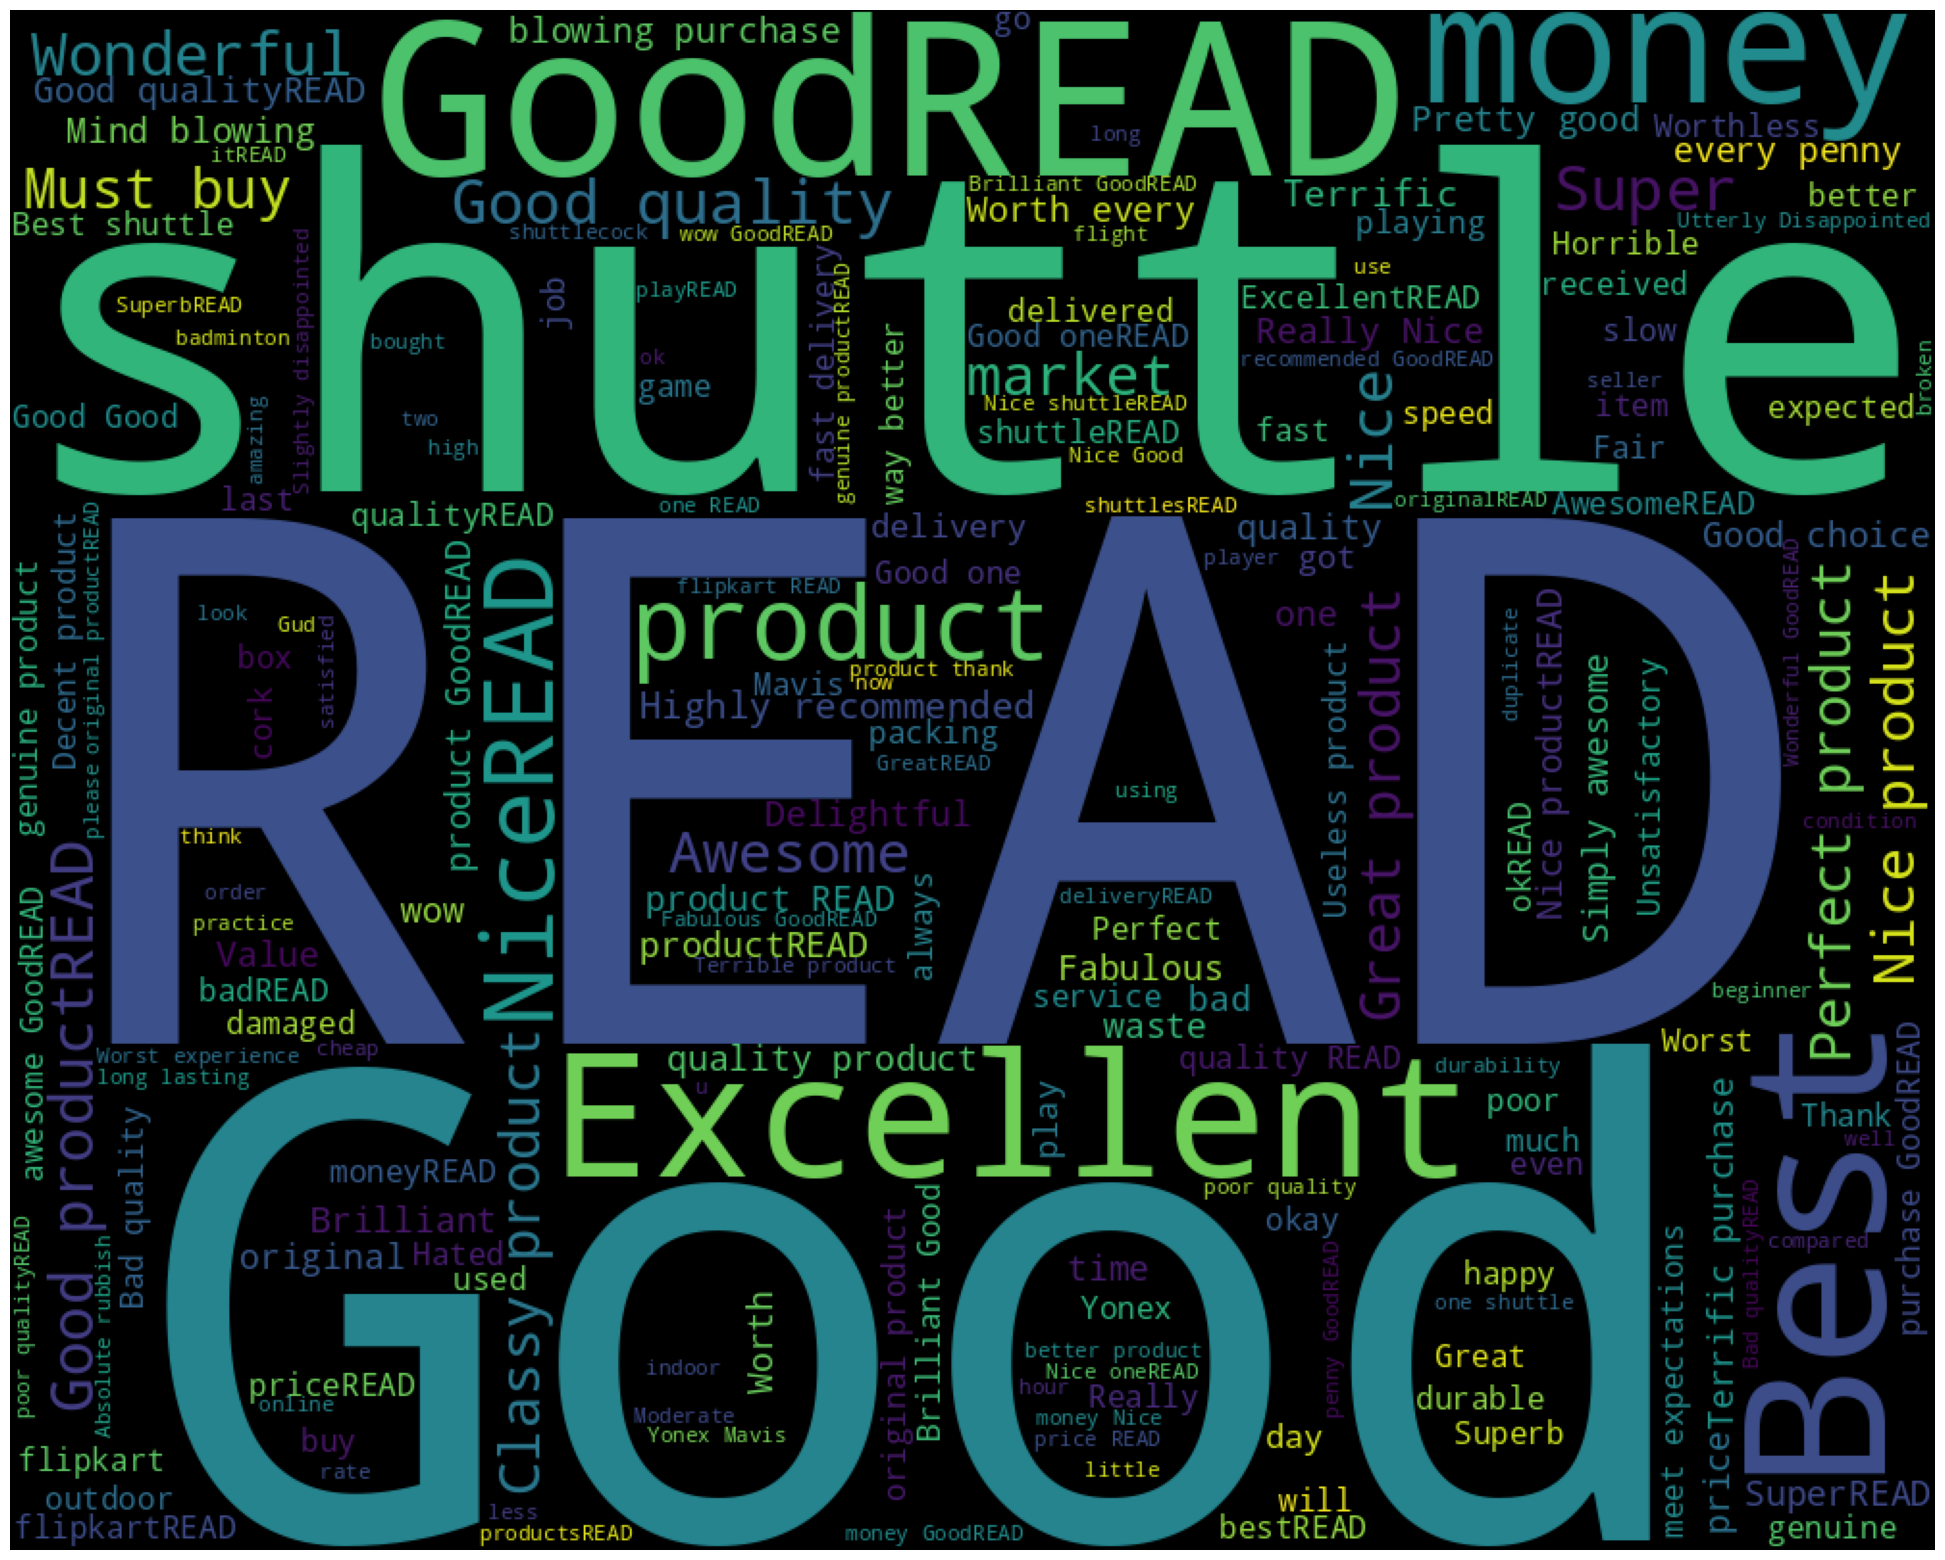

In [127]:
plt.figure(1,figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

### Step 1 - Identify Input and Output

In [128]:
X = df.Review
y = df.Rating

In [129]:
print(X.shape, y.shape)

(8510,) (8510,)


### Step 2 - Split the Data into Train and Test

In [130]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5957,) (5957,)
(2553,) (2553,)


### Step 3 - Data Preprocessing on train data (X_train)

In [131]:
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [132]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [133]:
def clean(doc):
  doc = doc.replace("</br>", " ")

  doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])

  # Converting to lower case
  doc = doc.lower()

  # Tokenization
  tokens = nltk.word_tokenize(doc)

  # Lemmatize
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

  # Stop word removal
  stop_words = set(stopwords.words('english'))
  filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]

  # Join and return
  return " ".join(filtered_tokens)

In [134]:
# Improving the efficiency by applying cleaning the text data before hand

%time X_train_clean = X_train.apply(lambda doc: clean(doc))

CPU times: user 1.19 s, sys: 102 ms, total: 1.29 s
Wall time: 1.3 s


In [135]:
%time X_test_clean = X_test.apply(lambda doc: clean(doc))

CPU times: user 473 ms, sys: 34 ms, total: 507 ms
Wall time: 508 ms


In [140]:
import warnings
warnings.filterwarnings('ignore')

In [136]:
import joblib
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from joblib import Memory

In [143]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression(class_weight='balanced'))
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [100,1000, 1500, 2000, 5000],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['elasticnet'],
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced', None]
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=5,
                               scoring='f1_weighted',
                               return_train_score=True,
                               verbose=1
                              )

    %time grid_search.fit(X_train_clean, y_train)

    best_models[algo] = grid_search.best_estimator_

    print('Score on Test Data: ', grid_search.score(X_test_clean, y_test))

********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: user 4.32 s, sys: 22.9 ms, total: 4.35 s
Wall time: 4.36 s
Score on Test Data:  0.9013108869809812
********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: user 19.8 s, sys: 56.9 ms, total: 19.8 s
Wall time: 19.9 s
Score on Test Data:  0.9009167208256342
********** logistic_regression **********
Fitting 5 folds for each of 180 candidates, totalling 900 fits
CPU times: user 11min 44s, sys: 799 ms, total: 11min 45s
Wall time: 11min 46s
Score on Test Data:  0.9165909685847997


In [144]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization', CountVectorizer(max_features=1500)),
                ('classifier', MultinomialNB(alpha=1))])

decision_tree
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization', TfidfVectorizer(max_features=1000)),
                ('classifier', DecisionTreeClassifier(max_depth=10))])

logistic_regression
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier',
                 LogisticRegression(C=10, l1_ratio=0.5, penalty='elasticnet',
                                    solver='saga'))])



In [149]:
from sklearn import metrics
import os

train_f1_scores = []
test_f1_scores = []

for name, model in best_models.items():
    print(""*10, name, ""*10)

    # Save the model
    joblib.dump(model, f'{name}.pkl')

    # Load the model
    model = joblib.load(f'{name}.pkl')

    # Predictions on test data
    y_test_pred = model.predict(X_test_clean)
    test_f1 = metrics.f1_score(y_test, y_test_pred, average='weighted')  # Use appropriate averaging strategy
    test_f1_scores.append(test_f1)

    # Predictions on train data (assuming X_train is available)
    y_train_pred = model.predict(X_train_clean)
    train_f1 = metrics.f1_score(y_train, y_train_pred, average='weighted')  # Use appropriate averaging strategy
    train_f1_scores.append(train_f1)

    print("F1 Score on Train Data:", train_f1)
    print("F1 Score on Test Data:", test_f1)

    print("Model Size:", os.path.getsize(f'{name}.pkl'), "Bytes")

 naive_bayes 
F1 Score on Train Data: 0.9122654500151871
F1 Score on Test Data: 0.9013108869809812
Model Size: 118583 Bytes
 decision_tree 
F1 Score on Train Data: 0.9219843307042047
F1 Score on Test Data: 0.9009167208256342
Model Size: 86525 Bytes
 logistic_regression 
F1 Score on Train Data: 0.9543672454872542
F1 Score on Test Data: 0.9165909685847997
Model Size: 110762 Bytes
